In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Generate sine wave

In [7]:
time = np.arange(0, 2*math.pi, math.pi/20)

In [8]:
amplitude = np.sin(time)

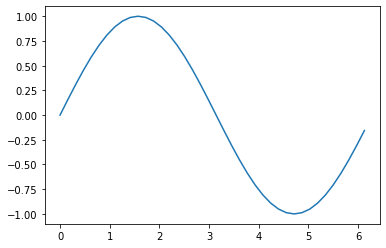

In [9]:
plt.plot(time, amplitude)

# Generate sine wave with a frequency and sample rate

In [110]:
S_rate = 44100
T = 1/S_rate

In [39]:
print("44100 Hz, Sampling Time is {:.3f} ms".format(T*1000))

44100 Hz, Sampling Time is 0.023 ms


In [31]:
# make sine wage
freq = 100
omega = 2*np.pi*freq

In [40]:
# x : 0 ~ 0.1 sec 44100Hz
x = np.arange(0, 0.1, T)
y = np.sin(omega*x)

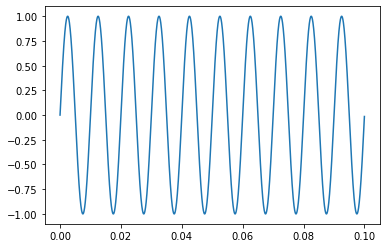

In [41]:
plt.plot(x, y)
plt.show()

# how to read a wave file and show

In [42]:
import wave

In [43]:
file = wave.open('./data/sample/0kph.wav')

In [45]:
print('no of channels:', file.getnchannels())

no of channels: 1


In [46]:
print('sampling frequency:', file.getframerate())

sampling frequency: 44100


In [47]:
print('sample width:', file.getsampwidth())
# one sample has 2 byte, 16 bit. 2 power of 16, 65,536
# -32,768 ~ 32,767

sample width: 2


In [48]:
print('frames:', file.getnframes())

frames: 1532928


In [50]:
print('recording time(sec):', file.getnframes() / file.getframerate())

recording time(sec): 34.76027210884354


# how to access audio data samples from wave file

In [82]:
data = file.readframes(1)

In [83]:
data

b'\xac\xfd'

In [84]:
wav_data = np.fromstring(data, 'Int16')

/home/kimlab/.virtualenvs/audio/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/home/kimlab/.virtualenvs/audio/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


In [85]:
print(wav_data)

[-596]


ploting

In [86]:
S_rate = file.getframerate()
n_frames = file.getnframes()

In [87]:
S_rate, n_frames

(44100, 1532928)

In [99]:
# rewind to the first point
file.rewind()
# read all the frames : -1
data = file.readframes(-1)

In [100]:
w_data = np.fromstring(data, np.int16)

/home/kimlab/.virtualenvs/audio/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


In [101]:
w_data

array([    0,     0,     0, ..., -1672, -1677, -1679], dtype=int16)

In [102]:
len(w_data)

1532928

In [103]:
# return the current position of pointer
print(file.tell())

# set the position of pointer
file.setpos(10000)
print(file.tell())

# rewind the pointer to the first position
file.rewind()
print(file.tell())

1532928
10000
0


In [104]:
w_data.shape

(1532928,)

In [107]:
total_t = n_frames/S_rate

In [108]:
x = np.arange(0, total_t, 1/S_rate)
x

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       3.47602041e+01, 3.47602268e+01, 3.47602494e+01])

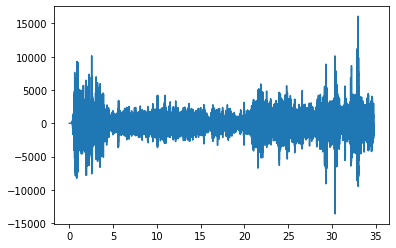

In [109]:
plt.plot(x, w_data)

# access wave form from the mic

In [124]:
import pyaudio

In [135]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
SECOND = 5

In [126]:
rec = pyaudio.PyAudio()

In [127]:
rec.get_default_input_device_info()

{'index': 12,
 'structVersion': 2,
 'name': 'default',
 'hostApi': 0,
 'maxInputChannels': 32,
 'maxOutputChannels': 32,
 'defaultLowInputLatency': 0.008707482993197279,
 'defaultLowOutputLatency': 0.008707482993197279,
 'defaultHighInputLatency': 0.034829931972789115,
 'defaultHighOutputLatency': 0.034829931972789115,
 'defaultSampleRate': 44100.0}

In [182]:
import time

stream = rec.open(format = FORMAT,
                 channels = CHANNELS,
                 rate = RATE,
                 input = True,
                 frames_per_buffer = CHUNK)

In [183]:
frames = []
ampls = []
flag = False

st = time.time()
for i in range(0, int(RATE * SECOND / CHUNK)) :
    
    data = stream.read(CHUNK)
    ampl = np.fromstring(data, np.int16)
    if not flag :
        ampls = ampl
    else :
        ampls = np.concatenate((ampls, ampl), axis = None)
        
    flag = True
    print(len(ampls))
#     ampls += ampl
#     frames.append(data)
    
en = time.time()
stream.stop_stream()
stream.close()

/home/kimlab/.virtualenvs/audio/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


1024
2048
3072
4096
5120
6144
7168
8192
9216
10240
11264
12288
13312
14336
15360
16384
17408
18432
19456
20480
21504
22528
23552
24576
25600
26624
27648
28672
29696
30720
31744
32768
33792
34816
35840
36864
37888
38912
39936
40960
41984
43008
44032
45056
46080
47104
48128
49152
50176
51200
52224
53248
54272
55296
56320
57344
58368
59392
60416
61440
62464
63488
64512
65536
66560
67584
68608
69632
70656
71680
72704
73728
74752
75776
76800
77824
78848
79872
80896
81920
82944
83968
84992
86016
87040
88064
89088
90112
91136
92160
93184
94208
95232
96256
97280
98304
99328
100352
101376
102400
103424
104448
105472
106496
107520
108544
109568
110592
111616
112640
113664
114688
115712
116736
117760
118784
119808
120832
121856
122880
123904
124928
125952
126976
128000
129024
130048
131072
132096
133120
134144
135168
136192
137216
138240
139264
140288
141312
142336
143360
144384
145408
146432
147456
148480
149504
150528
151552
152576
153600
154624
155648
156672
157696
158720
159744
160768
161792


In [178]:
en - st

4.126469135284424

In [179]:
len(ampls)

220160

In [181]:
RATE * SECOND - len(ampls)

340

In [184]:
ampls

array([ -990, -1332, -1328, ...,  -934,  -786,  -566], dtype=int16)

In [133]:
int(RATE * 5 / CHUNK)

215

In [148]:
np.fromstring(data, np.int16)

/home/kimlab/.virtualenvs/audio/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([-1294, -1076,  -734, ...,   282,   216,   308], dtype=int16)

In [144]:
len(frames)

215

In [147]:
np.fromstring(frames[-1], np.int16)

/home/kimlab/.virtualenvs/audio/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([-1294, -1076,  -734, ...,   282,   216,   308], dtype=int16)